In [44]:
import numpy as np
import json
from scipy import stats

In [21]:
def read_entropies(filepath):
    data = []
    with open(filepath, "r") as f:
        for line in f:
            data += [json.loads(line)]

    entropies = [data[i]["alphas"] for i in range(len(data))]

    return entropies


def get_avg_lcpe(baseline_filepath, iti_filepath, dola_filepath, decore_filepath):
    baseline_entropies = read_entropies(baseline_filepath)
    iti_entropies = read_entropies(iti_filepath)
    dola_entropies = read_entropies(dola_filepath)
    decore_entropies = read_entropies(decore_filepath)

    baseline_ses = []
    for entropies in baseline_entropies:
        baseline_ses += [sum(entropies)/len(entropies)]

    iti_ses = []
    for entropies in iti_entropies:
        iti_ses += [sum(entropies)/len(entropies)]

    dola_ses = []
    for entropies in dola_entropies:
        dola_ses += [sum(entropies[0])/len(entropies[0])]

    decore_ses = []
    for entropies in decore_entropies:
        decore_ses += [sum(entropies)/len(entropies)]

    print(f"Baseline Averaged Length-controlled Entropy: {np.mean(baseline_ses)} +/- {np.std(baseline_ses)}")
    print(f"ITI Averaged Length-controlled Entropy: {np.mean(iti_ses)} +/- {np.std(iti_ses)}")
    print(f"DoLa Averaged Length-controlled Entropy: {np.mean(dola_ses)} +/- {np.std(dola_ses)}")
    print(f"DeCoRe Averaged Length-controlled Entropy: {np.mean(decore_ses)} +/- {np.std(decore_ses)}")

    # Statistical test
    from scipy.stats import ttest_ind
    print("Baseline vs ITI")
    print(ttest_ind(baseline_ses, iti_ses))
    print("Baseline vs DoLa")
    print(ttest_ind(baseline_ses, dola_ses))
    print("Baseline vs DeCoRe")
    print(ttest_ind(baseline_ses, decore_ses))
    print("ITI vs DoLa")
    print(ttest_ind(iti_ses, dola_ses))
    print("ITI vs DeCoRe")
    print(ttest_ind(iti_ses, decore_ses))
    print("DoLa vs DeCoRe")
    print(ttest_ind(dola_ses, decore_ses))

    return {
        "Baseline": baseline_ses,
        "ITI": iti_ses,
        "DoLa": dola_ses,
        "DeCoRe": decore_ses
    }

In [22]:
# TruthfulQA
print("TruthfulQA")
decore_filepath = "../predictions/truthfulqa/pred_TruthfulQA_LLaMA3-8b-Instruct__DeCoReEntropy.json"
baseline_filepath = "../predictions/truthfulqa/pred_TruthfulQA_LLaMA3-8b-Instruct__Baseline.json"
iti_filepath = "../predictions/truthfulqa/pred_TruthfulQA_ITI-LLaMA3-8b-Instruct__Baseline.json"
dola_filepath = "../predictions/truthfulqa/pred_TruthfulQA_LLaMA3-8b-Instruct__DoLa.json"
truthfulqa_sess = get_avg_lcpe(baseline_filepath, iti_filepath, dola_filepath, decore_filepath)

# XSum
print("XSum")
decore_filepath = "../predictions/XSum/pred_XSum_LLaMA3-8b-Instruct__DeCoReEntropy.json"
baseline_filepath = "../predictions/XSum/pred_XSum_LLaMA3-8b-Instruct__Baseline.json"
iti_filepath = "../predictions/XSum/pred_XSum_ITI-LLaMA3-8b-Instruct__Baseline.json"
dola_filepath = "../predictions/XSum/pred_XSum_LLaMA3-8b-Instruct__DoLa.json"
xsum_sess = get_avg_lcpe(baseline_filepath, iti_filepath, dola_filepath, decore_filepath)

# MuSiQue Open Book
print("MuSiQue Open Book")
decore_filepath = "../predictions/MuSiQue_cot_open_book/pred_MuSiQue_LLaMA3-8b-Instruct__DeCoReEntropy.json"
baseline_filepath = "../predictions/MuSiQue_cot_open_book/pred_MuSiQue_LLaMA3-8b-Instruct__Baseline.json"
iti_filepath = "../predictions/MuSiQue_cot_open_book/pred_MuSiQue_ITI-LLaMA3-8b-Instruct__Baseline.json"
dola_filepath = "../predictions/MuSiQue_cot_open_book/pred_MuSiQue_LLaMA3-8b-Instruct__DoLa.json"
musique_ob_sess = get_avg_lcpe(baseline_filepath, iti_filepath, dola_filepath, decore_filepath)

# MuSiQue Closed Book
print("MuSiQue Closed Book")
decore_filepath = "../predictions/MuSiQue_cot_closed_book/pred_MuSiQue_LLaMA3-8b-Instruct__DeCoReEntropy.json"
baseline_filepath = "../predictions/MuSiQue_cot_closed_book/pred_MuSiQue_LLaMA3-8b-Instruct__Baseline.json"
iti_filepath = "../predictions/MuSiQue_cot_closed_book/pred_MuSiQue_ITI-LLaMA3-8b-Instruct__Baseline.json"
dola_filepath = "../predictions/MuSiQue_cot_closed_book/pred_MuSiQue_LLaMA3-8b-Instruct__DoLa.json"
musique_cb_sess = get_avg_lcpe(baseline_filepath, iti_filepath, dola_filepath, decore_filepath)

TruthfulQA
Baseline Averaged Length-controlled Entropy: 0.3744051032184143 +/- 0.20169196972326983
ITI Averaged Length-controlled Entropy: 0.5936039014107882 +/- 0.20954388676785807
DoLa Averaged Length-controlled Entropy: 0.373363970117539 +/- 0.19942873648286621
DeCoRe Averaged Length-controlled Entropy: 0.39671052765412046 +/- 0.22514427097670434
Baseline vs ITI
TtestResult(statistic=-21.529211409328138, pvalue=1.0713612538806335e-90, df=1632.0)
Baseline vs DoLa
TtestResult(statistic=0.10485383937874342, pvalue=0.9165046724506813, df=1632.0)
Baseline vs DeCoRe
TtestResult(statistic=-2.107922913810211, pvalue=0.03518979104284399, df=1632.0)
ITI vs DoLa
TtestResult(statistic=21.748489996560647, pvalue=2.6623546911618034e-92, df=1632.0)
ITI vs DeCoRe
TtestResult(statistic=18.286637839677933, pvalue=4.189182658043969e-68, df=1632.0)
DoLa vs DeCoRe
TtestResult(statistic=-2.217355904480175, pvalue=0.02673609942449897, df=1632.0)
XSum
Baseline Averaged Length-controlled Entropy: 0.40826762

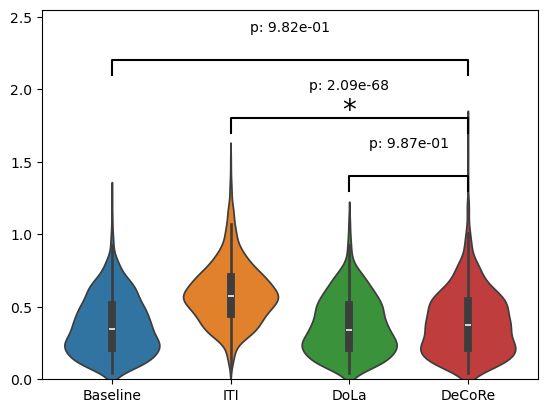

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns

truthfulqa_sess_df = pd.DataFrame(truthfulqa_sess)
sns.violinplot(data=truthfulqa_sess_df)

stat, p_value = stats.ttest_ind(truthfulqa_sess_df['DeCoRe'], truthfulqa_sess_df['Baseline'], alternative='less')
plt.text(x=1.5, y=2.4, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=1.5, y=2.2, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([0, 0, 3, 3], [2.1, 2.2, 2.2, 2.1], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(truthfulqa_sess_df['DeCoRe'], truthfulqa_sess_df['ITI'], alternative='less')
plt.text(x=2, y=2, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2, y=1.8, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([1, 1, 3, 3], [1.7, 1.8, 1.8, 1.7], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(truthfulqa_sess_df['DeCoRe'], truthfulqa_sess_df['DoLa'], alternative='less')
plt.text(x=2.5, y=1.6, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2.5, y=1.4, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([2, 2, 3, 3], [1.3, 1.4, 1.4, 1.3], lw=1.5, c="black")

plt.ylim((0, 2.55))
plt.show()

plt.show()

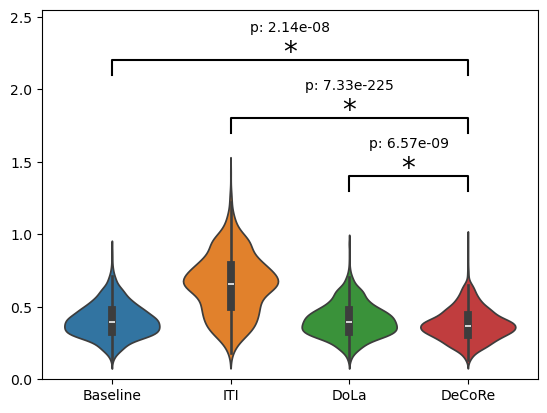

In [67]:
xsum_sess_df = pd.DataFrame(xsum_sess)
sns.violinplot(data=xsum_sess_df)

stat, p_value = stats.ttest_ind(xsum_sess_df['DeCoRe'], xsum_sess_df['Baseline'], alternative='less')
plt.text(x=1.5, y=2.4, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=1.5, y=2.2, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([0, 0, 3, 3], [2.1, 2.2, 2.2, 2.1], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(xsum_sess_df['DeCoRe'], xsum_sess_df['ITI'], alternative='less')
plt.text(x=2, y=2, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2, y=1.8, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([1, 1, 3, 3], [1.7, 1.8, 1.8, 1.7], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(xsum_sess_df['DeCoRe'], xsum_sess_df['DoLa'], alternative='less')
plt.text(x=2.5, y=1.6, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2.5, y=1.4, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([2, 2, 3, 3], [1.3, 1.4, 1.4, 1.3], lw=1.5, c="black")

plt.ylim((0, 2.55))
plt.show()

plt.show()

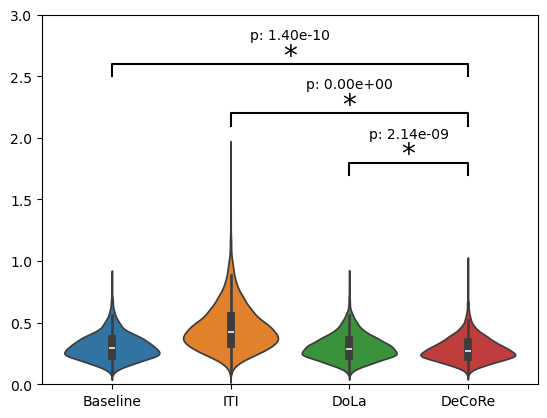

In [72]:
musique_ob_sess_df = pd.DataFrame(musique_ob_sess)
sns.violinplot(data=musique_ob_sess_df)

stat, p_value = stats.ttest_ind(musique_ob_sess_df['DeCoRe'], musique_ob_sess_df['Baseline'], alternative='less')
plt.text(x=1.5, y=2.8, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=1.5, y=2.6, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([0, 0, 3, 3], [2.5, 2.6, 2.6, 2.5], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(musique_ob_sess_df['DeCoRe'], musique_ob_sess_df['ITI'], alternative='less')
plt.text(x=2, y=2.4, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2, y=2.2, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([1, 1, 3, 3], [2.1, 2.2, 2.2, 2.1], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(musique_ob_sess_df['DeCoRe'], musique_ob_sess_df['DoLa'], alternative='less')
plt.text(x=2.5, y=2.0, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2.5, y=1.8, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([2, 2, 3, 3], [1.7, 1.8, 1.8, 1.7], lw=1.5, c="black")

plt.ylim((0, 3))
plt.show()

plt.show()

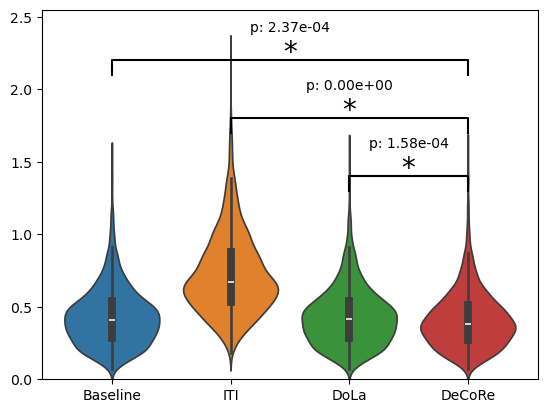

In [69]:
musique_cb_sess_df = pd.DataFrame(musique_cb_sess)
sns.violinplot(data=musique_cb_sess_df)

stat, p_value = stats.ttest_ind(musique_cb_sess_df['DeCoRe'], musique_cb_sess_df['Baseline'], alternative='less')
plt.text(x=1.5, y=2.8, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=1.5, y=2.6, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([0, 0, 3, 3], [2.5, 2.6, 2.6, 2.5], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(musique_cb_sess_df['DeCoRe'], musique_cb_sess_df['ITI'], alternative='less')
plt.text(x=2, y=2.4, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2, y=2.2, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([1, 1, 3, 3], [2.1, 2.2, 2.2, 2.1], lw=1.5, c="black")

stat, p_value = stats.ttest_ind(musique_cb_sess_df['DeCoRe'], musique_cb_sess_df['DoLa'], alternative='less')
plt.text(x=2.5, y=2.0, s=f'p: {p_value:.2e}', horizontalalignment='center')
if p_value < 0.05:
    plt.text(x=2.5, y=1.4, s='*', fontsize=20, color='black', horizontalalignment='center')
# Plot a line to signify comparison
plt.plot([2, 2, 3, 3], [1.3, 1.4, 1.4, 1.3], lw=1.5, c="black")

plt.ylim((0, 3.0))
plt.show()

plt.show()

In [37]:
xsum_sess_df.to_csv("xsum_sess.csv", index=False)